Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part I: Analysis
[6.   Extreme value distributions](#section_6)   

&nbsp;&nbsp;&nbsp;[6.1. Statistics of extreme values](#section_61)   
&nbsp;&nbsp;&nbsp;[6.2. Assimptotic distributions](#section_62)   
&nbsp;&nbsp;&nbsp;[6.3. Application: the $S_3$ factor in NBR6123](#section_63)   
&nbsp;&nbsp;&nbsp;[6.4. Characteristic velocity $V_k$ from data](#section_64)   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## 6. Extreme value distributions <a name="section_6"></a>

### 6.1. Statistics of extreme values <a name="section_61"></a>

Extreme values is a concept usually required in engineering analysis for definition 
of either _characteristics loads_ and _caracteristic strengths_. The concept is required
whenever we want to know the statistical properties of the largest or the smallest
value of a set of $N$ random variables, all of them with the same probability 
distribution, which in this context is called the _origin distribution_.
Some examples of application are:

1. From a set of samples for the maximum annual wind speed at a given site,
   we wish to calculate the statistical properties of the maximum wind speed 
   in $N = 50$ years.
   
2. From a set of samples for the load capacity of a single pile, we wish to calculate
   the load capacity of a foundation block with $N = 4$ piles, considering that 
   the failure of one single pile will cause the failure of the whole foundation.

The mathematical formulation of this problem starts with definition of a set
of $N$ RV's, $\left\{ X_1, X_2, \dots, X_N \right\}$. Without loss of generality
we assume that these RV's are previously ordered, $X_1 \leq X_2 \leq \dots \leq X_N$.

#### Distribution of minima

The smallest value among $N$ implies that if $X_1$ is larger than $x$, than all
$X_i$, with $i > 1$, are also larger than $x$. This means that:

$$ {\rm Prob} \left\{ X_1 > x \right\} = 
   {\rm Prob} \left\{ \bigcap_{i = 1}^N {X_i > x} \right\}$$ 

If all $N$ RV's are _statistically independent_ and from the same distribution,
the expression above simplifies to:

$$ 1 - P_{X(1:N)}(x) = \left[ 1 - P_X(x) \right]^N $$

where $P_{X(1:N)}(x)$ means "cumulative distribution of the smallest among $N$".
The corresponding probability density function can be obtained by derivation:

$$ p_{X(1:N)}(x) = \frac{d}{dx} P_{X(1:N)}(x) = N p_X(x) \left[ 1 - P_X(x) \right]^{N-1} $$

#### Distribution of maxima

The largest value among $N$ implies that if $X_N$ is smaller than $x$, than all
$X_i$, with $i < N$, are also smaller than $x$. This means that:

$$ {\rm Prob} \left\{ X_N \leq x \right\} = 
   {\rm Prob} \left\{ \bigcap_{i = 1}^N {X_i \leq x} \right\}$$ 

If all $N$ RV's are _statistically independent_ and from the same distribution,
the expression above simplifies to:

$$ P_{X(N:N)}(x) = \left[ P_X(x) \right]^N $$

where $P_{X(N:N)}(x)$ means "cumulative distribution of the largest among $N$".
The corresponding probability density function can be obtained by derivation:

$$ p_{X(N:N)}(x) = \frac{d}{dx} P_{X(N:N)}(x) = N p_X(x) \left[ P_X(x) \right]^{N-1} $$

#### Example

The script below presents the distribution of the smallest and largest values for 
a set of $N$ standard Gaussian distribution. We create a custom RV for both cases:

In [2]:
class Xtreme_1N(st.rv_continuous):

    def __init__(self, N):
        self.N = N
        self.X = st.norm(0, 1)             # change this to change origin
        st.rv_continuous.__init__(self)
    
    def _cdf(self, x):
        return 1 - (1 - self.X.cdf(x))**self.N

In [3]:

class Xtreme_NN(st.rv_continuous):

    def __init__(self, N):
        self.N = N
        self.X = st.norm(0, 1)             # change this to change origin
        st.rv_continuous.__init__(self)
    
    def _cdf(self, x):
        return (self.X.cdf(x))**self.N

Now we calculate and plot the smallest and the largest for some values of $N$:

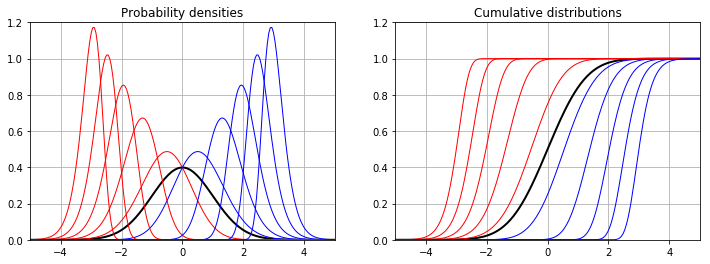

In [9]:
x   = np.linspace(-5, 5, 200)

X1  = Xtreme_1N(1)
f1  = plt.figure(1, figsize=(12, 4))

f11 = plt.subplot(1,2,1)
f1a = plt.plot(x, X1.pdf(x), 'k', lw=2)
f12 = plt.subplot(1,2,2)
f1b = plt.plot(x, X1.cdf(x), 'k', lw=2)

for k in [2, 8, 32, 128, 512]:
    
    X1  = Xtreme_1N(k)
    XN  = Xtreme_NN(k)

    f11 = plt.subplot(1,2,1)
    f1a = plt.plot(x, X1.pdf(x), 'r', lw=1)
    f1b = plt.plot(x, XN.pdf(x), 'b', lw=1)

    f12 = plt.subplot(1,2,2)
    f1a = plt.plot(x, X1.cdf(x), 'r', lw=1)
    f1b = plt.plot(x, XN.cdf(x), 'b', lw=1)


f11 = plt.subplot(1,2,1)
plt.axis([-5, 5, 0, 1.2])
plt.title('Probability densities')
plt.grid(True)

f12 = plt.subplot(1,2,2)
plt.axis([-5, 5, 0, 1.2])
plt.title('Cumulative distributions')
plt.grid(True)

It can be observed that the absolute mean value of the extreme distributions is increasing,
while the respective standard deviations are decreasing. It can be shown that this is 
a consequence of considering the independence of RV's in each set.

Expected value of smallest and largest can be easily calculated with the appropriate 
Python methods:


In [5]:
N  = 512

X1 = Xtreme_1N(N)
XN = Xtreme_NN(N)

print('Mean value of smallest among N is:         {0:6.3f}'.format(X1.mean()))
print('Standard deviation of smallest among N is: {0:6.3f}'.format(X1.std()),'\n')
print('Mean value of largest among N is:          {0:6.3f}'.format(XN.mean()))
print('Standard deviation of largest among N is:  {0:6.3f}'.format(XN.std()))


Mean value of smallest among N is:         -3.044
Standard deviation of smallest among N is:  0.370 

Mean value of largest among N is:           3.044
Standard deviation of largest among N is:   0.370


This calculation may take quite a large time to be performed.

## 6.2. Assimptotic distributions  <a name="section_62"></a>


## 6.3. Application: the $S_3$ factor in NBR6123 <a name="section_63"></a>

Este exemplo trata da especificação do fator $S_3$, aplicado na definição da 
velocidade básica do vento, $V_0$, conforme definições presentes na 
NBR6123/1988 - _Forças Devidas ao Vento nas Edificações_, 
bem como do uso de dados meteorológicos particulares para uma eventual modificação 
ou atualização de sua fórmula de cálculo.

A principal informação estatística necessária para o cálculo de $S_3$ é a probabilidade 
definida como:

$$ P_1 = {\rm Prob}\left\{ V \geq V_k \right\} $$

que representa _a probabilidade de a velocidade máxima anual, $V$, exceder o 
valor característico $V_k$_. O valor característico é definido no item 4.2(c) da 
norma, o que inclui as condições em que a variável aleatória $V$ é medida, através 
dos parâmetros $S_1$ e $S_2$.

Neste ponto apresentam-se duas hipótese de análise:

1. A probabilidade $P_1$ é constante no tempo (estacionária) e consequentemente 
   igual para todos os anos de vida útil da obra.
2. As velocidades máximas anuais observadas em dois anos quaisquer ao longo da vida 
   útil da obra são variáveis aleatórias independentes.

A primeira hipótese exclui quaisquer considerações sobre questões relacionada à 
mudança climática, enquanto a segunda hipótese significa, por exemplo, que a ocorrência 
de uma velocidade máxima anual excepcionalmente alta ou baixa em um determinado ano não 
tem qualquer implicância no que acontecerá em outro ano qualquer. 

Definida esta probabilidade $P_1$ e admitindo-se como plausíveis as hipóteses anteriores 
(o que de fato é feito na NBR6123), calcula-se a probabilidade $P_m$ de excedência do 
valor característico $V_k$ em $m$ anos como:

$$ (1 - P_m) = (1 - P_1)^m$$

ou seja, $V_k$ só não será excedida em $m$ anos se não for excedida em _nenhum_ 
dos $m$ anos. A equação acima é a expressão matemática dessa afirmação.

O cálculo de $S_3$ requer adicionalmente um terceira hipótese, que diz respeito
à escolha da função de distribuição de probabilidades para a velocidade máxima anual:

3. A velocidade máxima anual é uma variável aleatória com distribuição de probabilidades
   assintótica do Tipo II, ou seja, uma distribuição de _Frechet_.
   
A forma geral desta distribuição conduz à seguinte expressão para a probabilidade 
anual de não excedência:

$$ (1 - P_1) = \exp\left[ - \left( \frac{\alpha}{V_k} \right)^\beta \right] $$

onde $\alpha$ e $\beta$, são os parâmetros da distribuição definidos a partir de 
estimativas da média e do desvio padrão da velocidade máxima anual conforme as 
expressões (vide Ang & Tang, 1984):

\begin{align*}
\mu_V      &= \alpha   \;    \Gamma  \left( 1 - \frac{1}{\beta}\right) \\
\sigma_V^2 &= \alpha^2 \left[\Gamma  \left( 1 - \frac{2}{\beta}\right) 
                           - \Gamma^{2}\left( 1 - \frac{1}{\beta}\right)\right]
\end{align*}

onde $\Gamma(\cdot)$ é a função gama. É necessário um procedimento numérico 
interativo para, partindo-se de $\mu_V$ (valor médio) e $\sigma_V$ (desvio padrão) 
chegar-se a $\alpha$ e $\beta$. 

É muito importante deixar claro que a escolha da distribuição de Frechet 
_não é arbitrária_. Dentre as distribuições assintóticas de valores extremos 
ela é a que melhor ajustou a base de dados disponível na época em que foi 
elaborado o gráfico de isopletas da NBR6123.
A escolha da distribuição de Frechet também foi embasada em considerações tais 
como o fato de a variável aleatória $V$ ser por si mesma um valor extremo 
(máxima de doze máximas mensais). 
Distribuições assimptóticas preservam sua forma quando utilizadas como distribuição
de origem:

$$ (1 - P_m) = \exp\left[ -m \left( \frac{\alpha}{V_k} \right)^\beta \right] $$

Isolando-se então $V_k$ chega-se a:

$$ V_k = \alpha \left[ -\frac{\ln (1 - P_m)}{m} \right]^{-1/\beta} $$

Fazendo $\alpha = 0.54S_1 S_2 V_0$ e $\beta = 6.37$ verifica-se que a fórmula 
acima corresponde exatamente à expressão para $S_3$ utilizada na NBR6123:

$$ S_3 = 0.54 \left[ -\frac{\ln (1 - P_m)}{m} \right]^{-0.157} $$

Com estes valores de $\alpha$ e $\beta$ na pode-se calcular os valores implícitos 
na norma para o valor médio, o desvio padrão e o coeficiente de variação da velocidade 
máxima anual (conforme as condições definidas por $S_1$ e $S_2$):

In [6]:
from scipy.special import gamma

𝛼   = 0.54
𝛽   = 6.37

𝜇V  = 𝛼*gamma(1 - 1/𝛽) 
𝜎V  = 𝛼*np.sqrt(gamma(1 - 2/𝛽) - (gamma(1 - 1/𝛽))**2)
𝛿V  = 𝜎V/𝜇V

print('Implicit mean value is:          {0:6.3f}'.format(𝜇V))
print('Implicit standard deviation is:  {0:6.3f}'.format(𝜎V))
print('Implicit coeff. of variation is: {0:6.3f}'.format(𝛿V))

Implicit mean value is:           0.604
Implicit standard deviation is:   0.141
Implicit coeff. of variation is:  0.233


Portanto, conforme a NBR6123 a velocidade máxima anual considerada tem
as seguintes propriedades estatísticas:

\begin{align*}
\mu_V    &= 0.604 S_1 S_2 V_0 \\
\sigma_V &= 0.141 S_1 S_2 V_0 \\
\delta_V &= \sigma_V / \mu_V = 23.3\%
\end{align*}

Observa-se que o coeficiente de variação da velocidade máxima anual é o mesmo em todo 
o território nacional. Obviamente que todos estes parâmetros estatísticos podem e 
devem ser questionados. Contudo isso deve ser feito com base em um conjunto de 
amostras de velocidades máximas obtidas em condições conhecidas ($S_1$ e $S_2$), 
e grande o suficiente para minimizar o erro estatístico intrínseco a um processo 
de amostragem.

Este resultado pode ser visualizado através do script abaixo:

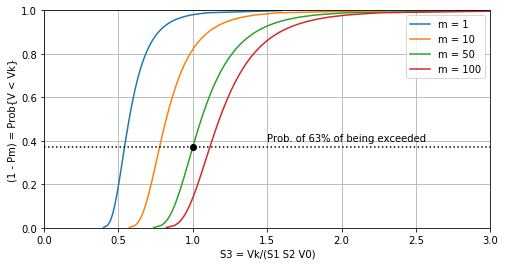

In [7]:
Pm  = np.linspace(1e-3, 1-1e-3, 100)
f02 = plt.figure(2, figsize=(8, 4))

for m in [1, 10, 50, 100]:
    
    S3   = 𝛼*(-np.log(1 - Pm)/m)**(-1/𝛽)
    f02a = plt.plot(S3, (1 - Pm))

plt.plot([0, 3],[0.37, 0.37],'k:')
plt.plot([1   ],[0.37      ],'ko')

plt.grid(True)
plt.axis([0, 3, 0, 1])
plt.legend(('m = 1', 'm = 10', 'm = 50', 'm = 100'))

xlb = plt.xlabel('S3 = Vk/(S1 S2 V0)')
ylb = plt.ylabel('(1 - Pm) = Prob{V < Vk}')
tlb = plt.text(1.5, 0.4, 'Prob. of 63% of being exceeded')

## 6.4. Characteristic velocity $V_k$ from data <a name="section_64"></a>

Se o projetista dispõe de um conjunto de amostras de velocidades máximas anuais, 
é possível revisar os parâmetros estatísticos implícitos na fórmula de $S_3$. 
Os passos seriam os seguintes:

1. Definir as condições de medição $S_1$ e $S_2$ de modo a corrigir as velocidades.
2. Estimar as estatísticas básicas: média, $\mu_V$, desvio padrão, $\sigma_V$, 
   e coeficiente de variação, $\delta_V$.
3. Caso a amostra seja muito limitada, é recomendável utilizar apenas o valor médio 
   (menor erro estatístico) e preservar o coeficiente de variação de 23.3% da norma.
4. Definido $\delta_V$, isolar o parâmetro $\beta$ na equação abaixo, através de 
   algum procedimento numérico iterativo:
   
   $$ \Gamma  \left( 1 - \frac{1}{\beta}\right) = 
      \Gamma  \left( 1 - \frac{2}{\beta}\right) - 
      \Gamma^{2}\left( 1 - \frac{1}{\beta}\right) $$
      
   sendo que se for preservado $\delta_V = 0.233$, então também mantém-se $\beta = 6.37$.
5. Conhecido $\beta$, calcula-se agora o parâmetro $\alpha$ através da média estimada 
   para as amostras. 
6. Especifica-se o nível de probabilidade $P_m$, a vida útil, $m$, respeitando-se
   a norma e chega-se finalmente ao valor da velocidade característica do projeto 
   através da equação de $V_k$ anteriormente apresentada.
   
   $$ V_k = \alpha \left[ -\frac{\ln (1 - P_m)}{m} \right]^{-1/\beta} $$

Este procedimento pode ser alternativamente utilizado para atualização da velocidade 
básica local, $V_0$, preservando-se os parâmetros $\alpha$ e $\beta$ da norma. 

Opcionalmente, caso o conjunto de amostras seja de boa qualidade, é possível até 
questionar-se a validade da distribuição de Frechet. Recomenda-se contudo que 
sejam sempre utilizadas distribuições do tipo assimptótica (Gumbel, Weibull ou
Frechet) tendo em vista a natureza da variável aleatória a ser modelada. 

O script abaixo pode ser usado como _template_ para ser realizar este tipo de
análise de dados. As velocidades máximas anuais dadas foram previamente simuladas 
de uma distribuição de Frèchet para representar 10 anos de observação.

In [8]:
# Some experimental data from observation
Vmax  = np.array([20, 21, 27, 20, 24, 18, 25, 21, 32, 16])

# Estimate statistical properties 
𝜇V = Vmax.mean()
𝜎V = Vmax.std()
𝛿V = 𝜎V/𝜇V

# Coefficient of variation from given beta parameter 
delta = lambda x: np.sqrt(gamma(1. - 2./x) - (gamma(1. - 1./x))**2)/gamma(1. - 1./x)

# Curve fit to calculate corresponding beta
𝛽   = 6.37
err = 1.00

while (np.abs(err) > 0.001):
    
    𝛿   = delta(𝛽)
    err = 𝛿V -  𝛿

    if (err > 0):
        𝛽 -= 0.01
    else:
        𝛽 += 0.01

# Calculate alpha from mean value
𝛼   = 𝜇V/gamma(1. - 1./𝛽)

# Determination of Vk for m = 50anos with Pm = 63%
m   = 50
Pm  = 1 - np.exp(-1)
Vk  = 𝛼*(-np.log(1 - Pm)/m)**(-1/𝛽)

print('Estimated mean is:      {0:6.2f}m/s'.format(𝜇V))
print('Estimated deviation is: {0:6.2f}m/s'.format(𝜎V))
print('Calculated 𝛼 is:        {0:6.2f}m/s'.format(𝛼))
print('Calculated 𝛽 is:        {0:6.2f}'.format(𝛽))
print('Calculated Vk is:       {0:6.2f}m/s'.format(Vk))

Estimated mean is:       22.40m/s
Estimated deviation is:   4.45m/s
Calculated 𝛼 is:         20.35m/s
Calculated 𝛽 is:          7.28
Calculated Vk is:        34.83m/s


Observa-se que as amostras são nitidamente menores que a velocidade 
característica final. Esta resulta aproximadamente 1.5 vezes do valor médio! 
Este resultado, bem como suas implicações em projetos estruturais, são mera 
consequência das três hipóteses de cálculo feitas para a dedução da fórmula de $S_3$. 
E essa dura imposição dos números só pode ser aplacada por um questionamento bem 
fundamentado sobre essas hipóteses.